In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


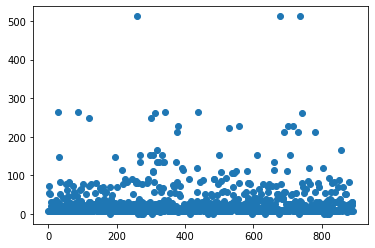

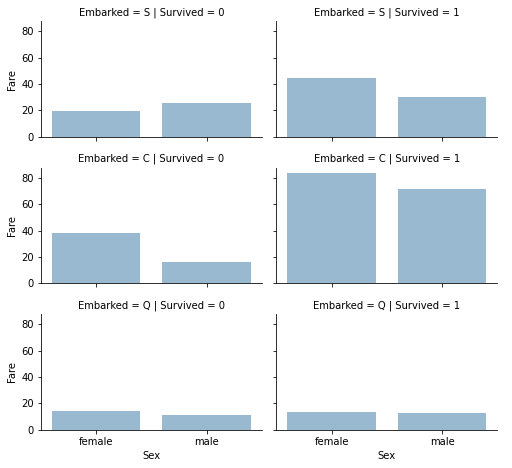

In [3]:
train_df.describe()
plt.scatter(np.arange(len(train_df['Fare'])), train_df['Fare'])
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [4]:
train_df.drop(['Ticket','Cabin'], axis=1, inplace=True)
test_df.drop(['Ticket','Cabin'], axis=1, inplace=True)
combine=[train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
print(train_df.Title.value_counts())
for dataset in combine:
    dataset.Title = dataset.Title.replace(['Mlle','Ms'],'Miss')
    dataset.Title = dataset.Title.replace('Mme', 'Mrs')
    dataset.loc[~dataset.Title.isin(['Mr','Miss','Mrs']),'Title']= 'Rare'
print(train_df.Title.value_counts())

title_mapping={'Mr':1, 'Miss':2, 'Mrs':3, 'Rare':4}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.drop(['Name','PassengerId'],axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
test_df.describe()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Capt          1
Jonkheer      1
Ms            1
Mme           1
Sir           1
Don           1
Countess      1
Name: Title, dtype: int64
Mr      517
Miss    185
Mrs     126
Rare     63
Name: Title, dtype: int64


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,1.727273
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.965731
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,4.000000


In [5]:

sex_mapping = {'male':1, 'female':2}
embarked_mapping = {'S':1, 'C':2, 'Q':3, 'Rare':4}
combine = [train_df, test_df]
for dataset in combine:
    dataset.sort_values(by=['Sex','Embarked','Title','SibSp','Parch','Age'])
    dataset.fillna(method='ffill', inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

train_df['AgeBand'] = pd.cut(train_df['Age'], 5, precision=0)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

test_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,1.363636,30.090909,0.447368,0.392344,35.560845,1.464115,1.727273
std,120.810458,0.841838,0.481622,13.925680,0.896760,0.981429,55.856972,0.685516,0.965731
min,892.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,996.250000,1.000000,1.000000,22.000000,0.000000,0.000000,7.895800,1.000000,1.000000
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1204.750000,3.000000,2.000000,39.000000,1.000000,0.000000,31.471875,2.000000,2.000000
max,1309.000000,3.000000,2.000000,76.000000,8.000000,9.000000,512.329200,3.000000,4.000000


In [6]:
interval=train_df['AgeBand'].unique().sort_values()
for dataset in combine:
    dataset.loc[dataset['Age']<=interval[0].right,'Age'] = 0
    dataset.loc[(dataset['Age']>interval[1].left)&(dataset['Age']<=interval[1].right),'Age'] = 1
    dataset.loc[(dataset['Age']>interval[2].left)&(dataset['Age']<=interval[2].right),'Age'] = 2
    dataset.loc[(dataset['Age']>interval[3].left)&(dataset['Age']<=interval[3].right),'Age'] = 3
    dataset.loc[(dataset['Age']>interval[4].left)&(dataset['Age']<=interval[4].right),'Age'] = 4
    
train_df.drop(columns=['AgeBand'],inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,1,1
1,1,1,2,2,1,0,71.2833,2,3
2,1,3,2,1,0,0,7.9250,1,2
3,1,1,2,2,1,0,53.1000,1,3
4,0,3,1,2,0,0,8.0500,1,1


In [7]:
combine=[train_df, test_df]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1
    dataset.drop(['SibSp', 'Parch'], inplace=True, axis=1)


In [8]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4, precision=0)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
combine = [train_df, test_df]

interval=train_df['FareBand'].unique().sort_values()

for dataset in combine:
    dataset.loc[dataset['Fare']<=interval[0].right,'Fare'] = 0
    dataset.loc[(dataset['Fare']>interval[1].left)&(dataset['Fare']<=interval[1].right),'Fare'] = 1
    dataset.loc[(dataset['Fare']>interval[2].left)&(dataset['Fare']<=interval[2].right),'Fare'] = 2
    dataset.loc[(dataset['Fare']>interval[3].left)&(dataset['Fare']<=interval[3].right+1),'Fare'] = 3
train_df.drop(['FareBand'], axis=1, inplace=True)

print(train_df.head())
print(test_df.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  FamilySize  IsAlone
0         0       3    1    1   0.0         1      1           2        0
1         1       1    2    2   3.0         2      3           2        0
2         1       3    2    1   0.0         1      2           1        1
3         1       1    2    2   3.0         1      3           2        0
4         0       3    1    2   1.0         1      1           1        1
   PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  FamilySize  IsAlone
0          892       3    1    2   0.0         3      1           1        1
1          893       3    2    2   0.0         1      3           2        0
2          894       2    1    3   1.0         3      1           1        1
3          895       3    1    1   1.0         1      1           1        1
4          896       3    2    1   1.0         1      3           3        0


In [9]:
X_train = train_df.drop('Survived',axis=1)
y_train = train_df.Survived
X_test = test_df.drop('PassengerId',axis=1).copy()

logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
log_score = round(logreg.score(X_train, y_train)*100,2)
log_score

81.71

In [10]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_score = round(svc.score(X_train, y_train)*100, 2)
svc_score

83.28

In [11]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':(3,4,5,6), 'leaf_size':(10,20,30)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring = 'accuracy')
clf.fit(X_train, y_train)
clf_best = clf.best_estimator_
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)
knn_score = round(clf_best.score(X_train, y_train)*100,2)
knn_score

85.63

In [12]:
parameters_RF = {"n_estimators":(500,700,900,1100,1200),'min_samples_split':(10,20,30), 'max_depth':(6,8)}
RF = RandomForestClassifier()
X_train_dummy=pd.get_dummies(X_train)
X_test_dummy=pd.get_dummies(X_test)
RF_clf = GridSearchCV(RF, parameters_RF, scoring='accuracy')
RF_clf.fit(X_train_dummy, y_train)
RF_clf_best = RF_clf.best_estimator_
print(RF_clf_best)
RF_clf_best.fit(X_train_dummy, y_train)
predictions=RF_clf_best.predict(X_test_dummy)
RF_score = round(RF_clf_best.score(X_train_dummy, y_train)*100,2)
RF_score



RandomForestClassifier(max_depth=6, min_samples_split=20, n_estimators=1200)


84.4

In [13]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)